In [28]:
#got the consolidate excel file which include RFM score and cluster of customer by weeks 

In [29]:
#create separate excel for the each and every customer extracting week number monetary values and RFM score

In [1]:
#create separate excel for the each and every customer extracting week number monetary values and RFM score
#------------------------------------------5th script--------------------------------------------------------------------------
import pandas as pd
import os

# Read the input file
#consolidate_df = pd.read_excel(r'C:\Users\GCV\Documents\MAS\Project AR\2nd_final_output\Consolidated_file.xlsx")
consolidate_df = pd.read_excel(r'C:\Users\GCV\Documents\MAS\Project AR\Testing\Demo\data_files\Consolidated_file_sorted.xlsx')

# Get unique customer names
customer_names = consolidate_df["Customer"].unique()

# Iterate over each customer and create a separate Excel file
for customer in customer_names:
    # Filter the dataframe for the current customer
    #customer_df = consolidate_df[consolidate_df["Customer"] == customer][["RFM_Score", "Customer_segment", "Week", "Cluster","Monetory"]]
    customer_df1 = consolidate_df[consolidate_df["Customer"] == customer][[ "Date","Week","RFM_Score"]]

    # Create output file name
    output_file_name = f"{customer}.xlsx"
    #output_folder = r"C:/Users/GCV/Documents/MAS/Project AR/con_output/"
    output_folder1 = r"C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_RFM/"
   
    #output_file_path = os.path.join(output_folder, output_file_name)
    output_file_path1 = os.path.join(output_folder1, output_file_name)
    
    #remove time part of date
    customer_df1['Date'] = customer_df1['Date'].dt.date
    
    #Remove customers who has low data points(when customer has low datapoints ES model occurs some errors)
    row_count  = customer_df1.shape[0]
    if row_count >20:
        customer_df1.to_excel(output_file_path1, index=False)


In [2]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from openpyxl import Workbook as wb
from itertools import cycle

import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import openpyxl


In [3]:
#------------------------put model into future_prediction function-(6th script)------------------------------------------------
def future_prediction(filename):
    # Load the input data from the excel file

    # Perform the time series modeling here

    %matplotlib inline 
    plt.style.use('bmh')
    sns.set_style("whitegrid")
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    warnings.filterwarnings("ignore")
    color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    
    base_name = os.path.splitext(os.path.basename(file_path))[0]
    
    #calculate smape
    def smape(a,f):
        return 1/len(a)*np.sum(2 * np.abs(f - a) / (np.abs(a)+ np.abs(f))*100)
    
    #read the file
    rfm_data=pd.read_excel(filename)
    rfm_data.head()
    #split data into train and test
    row_count  = rfm_data.shape[0]

    train_data = rfm_data.iloc[:(row_count-8)]
    test_data = rfm_data.iloc[(row_count-8):] 
    print(base_name)
    print(train_data)
    print("++++++++++++++++++++++++++++++")
    print(f"test data:\n{test_data}")
    #print(train_data)
    #getting predicting values
    span = 12
    alpha = 2/(span+1)

    simpleExpSmooth_model = SimpleExpSmoothing(train_data['RFM_Score']).fit(smoothing_level=alpha,optimized=True)
    doubleExpSmooth_model = ExponentialSmoothing(train_data['RFM_Score'],trend='add',seasonal_periods=6).fit()
    tripleExpSmooth_model = ExponentialSmoothing(train_data['RFM_Score'],trend='add',damped_trend=True,seasonal='add',seasonal_periods=6).fit()

    predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(8)
    predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(8)
    predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(8)
    
    
    #calculate smape
    smape_simple = smape(test_data["RFM_Score"] ,predictions_simpleExpSmooth_model)
    smape_double = smape(test_data["RFM_Score"] ,predictions_doubleExpSmooth_model)
    smape_triple = smape(test_data["RFM_Score"] ,predictions_tripleExpSmooth_model)
    
    
    
    train_data['RFM_Score'].plot(legend=True,label='TRAIN')
    test_data['RFM_Score'].plot(legend=True,label='TEST',figsize=(15,6))
    predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
    predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
    predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast')


    model = tripleExpSmooth_model = ExponentialSmoothing(train_data['RFM_Score'],trend='add',damped_trend=True,seasonal='add',seasonal_periods=6).fit()
    fcast_simple = simpleExpSmooth_model.predict(len(rfm_data),len(rfm_data)+ 3).rename('Simple Exponential Forecast')
    fcast_double = doubleExpSmooth_model.predict(len(rfm_data),len(rfm_data)+3).rename('Double Exponential Forecast')
    fcast_triple = tripleExpSmooth_model.predict(len(rfm_data),len(rfm_data)+3).rename('Triple Exponential Forecast')

    
    new_data = {'Customer Name': [base_name], 'Predicted Values': [predictions_tripleExpSmooth_model] ,'Future Predictions Simple ES': [fcast_simple] , 'Future Predictions Double ES': [fcast_double], 'Future Predictions Triple ES': [fcast_double], 'sMAPE Simple ES':[smape_simple], 'sMAPE Double ES':[smape_double], 'sMAPE Triple ES':[smape_triple]}  
    
    print("*********************************")
    print(f"predicted values: \n{predictions_tripleExpSmooth_model}")
    print("##################################")
    print(f"sMAPE tripple:- {smape_triple}")
    print(f"sMAPE double:- {smape_double}")
    print(f"sMAPE simple:- {smape_simple}")
    
    print("------------------------------------------------------------------------------------------------------------------------------")

    
    # Create DataFrame  
    final_data = pd.DataFrame(new_data)  
    
          

    return final_data  


Abercrombie & Fitch Trading Co.
         Date Week  RFM_Score
0  2022-04-18  W16   2.307692
1  2022-04-25  W17   2.629310
2  2022-05-02  W18   2.620968
3  2022-05-09  W19   2.620968
4  2022-05-16  W20   2.419355
5  2022-05-23  W21   2.233607
6  2022-05-30  W22   2.697647
7  2022-06-06  W23   2.875000
8  2022-06-13  W24   2.958333
9  2022-06-20  W25   2.450487
10 2022-06-27  W26   3.448446
11 2022-07-04  W27   4.419643
12 2022-07-11  W28   2.916667
13 2022-07-18  W29   2.633929
14 2022-07-25  W30   2.834821
15 2022-08-01  W31   2.916667
16 2022-08-08  W32   3.645833
17 2022-08-15  W33   2.606280
18 2022-08-22  W34   2.809197
19 2022-08-29  W35   3.297101
20 2022-09-05  W36   3.750000
21 2022-09-12  W37   3.750000
22 2022-09-19  W38   4.022537
23 2022-09-26  W39   3.593750
24 2022-10-10  W41   2.633772
25 2022-10-17  W42   2.681452
26 2022-11-07  W45   2.500000
27 2022-11-14  W46   3.604167
28 2022-11-21  W47   3.916667
29 2022-11-28  W48   4.030172
30 2022-12-05  W49   4.464286
31 2022-

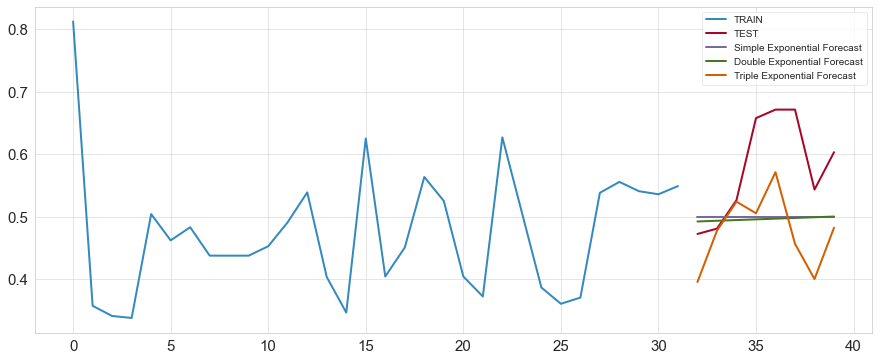

In [4]:

input_folder = "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_RFM/"
output_folder = "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_prediction/"

for filename in os.listdir(input_folder):
    if filename.endswith(".xlsx"):
        #print(filename)
        file_path = os.path.join(input_folder, filename)

        final_data = future_prediction(file_path)
        
        final_data.to_excel(os.path.join(output_folder, filename))

        
print("prediction part done")

In [5]:
#creating dashboard back end excel file(adding 2022(rfm,cluster,segmentation) and 2023(rfm,cluster,segmentation) columns)
#--------------------------------------------7th script------------------------------------------------------------------
import pandas as pd
import warnings
warnings.simplefilter("ignore")


# read in the data from an Excel file
df = pd.read_excel(r"C:\Users\GCV\Documents\MAS\Project AR\Testing\Demo\data_files\Consolidated_file_sorted.xlsx")

df['Week_num'] = df['Week'].str.extract(r'(\d+)').astype(int)

# Extract the year from the 'Date' column
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Filter the data frame based on the year
df_2022 = df[df['Year'] == 2022]
df_2023 = df[df['Year'] == 2023]

# Drop the 'Year' column from both data frames
df_2022.drop('Year', axis=1, inplace=True)
df_2023.drop('Year', axis=1, inplace=True)


# create new columns for 2022 and 2023 weeks
df_2022['2022 Week'] = df_2022['Week']
df_2023['2023 Week'] = df_2023['Week']


# concatenate the two subsets back into the original DataFrame
df = pd.concat([df_2022, df_2023], ignore_index=True)

#print(df)

# Create new columns with empty values
df['RFM_Score_2022'] = ''
df['Customer_segment_2022'] = ''
df['Cluster_2022'] = ''
df['Date_2022'] = ''



# Create a boolean mask for the rows where "2022 Week" is not null
mask = ~df['2022 Week'].isnull()

# Assign the values to the new columns using the mask
df.loc[mask, 'RFM_Score_2022'] = df.loc[mask, 'RFM_Score']
df.loc[mask, 'Customer_segment_2022'] = df.loc[mask, 'Customer_segment']
df.loc[mask, 'Cluster_2022'] = df.loc[mask, 'Cluster']
df.loc[mask, 'Date_2022'] = df.loc[mask, 'Date']



df['RFM_Score_2023'] = ''
df['Customer_segment_2023'] = ''
df['Cluster_2023'] = ''
df['Date_2023'] = ''



# Create a boolean mask for the rows where "2022 Week" is not null
mask = ~df['2023 Week'].isnull()

# Assign the values to the new columns using the mask
df.loc[mask, 'RFM_Score_2023'] = df.loc[mask, 'RFM_Score']
df.loc[mask, 'Customer_segment_2023'] = df.loc[mask, 'Customer_segment']
df.loc[mask, 'Cluster_2023'] = df.loc[mask, 'Cluster']
df.loc[mask, 'Date_2023'] = df.loc[mask, 'Date']





# drop the 'Unnamed: 0' column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

df = df.reset_index(drop=True)
# set a new index
#df = df.set_index('index')

# print the result
print(df.head())
print(df.tail())


# save the result to a new Excel file
df.to_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/data_files/Actual_values.xlsx", index=False)


        Date                          Customer  RFM_Score  \
0 2022-04-18  AMAZON ESSENTIAL - SPOTTED ZEBRA   1.999434   
1 2022-04-18                      slick chicks   2.304864   
2 2022-04-18   The Colombo Fashion WSwim Pvt L   1.903281   
3 2022-04-18                  Summersalt, Inc.   3.410633   
4 2022-04-18                        Speedo PVH   2.537707   

               Customer_segment Week  Cluster    Monetory  Total Receivable  \
0        Less Overdue - 1<RFM<2  W16        2    11178.00          11178.00   
1  Moderate Overdue - 2<RFM<3.5  W16        3   292881.24         192881.24   
2        Less Overdue - 1<RFM<2  W16        2     5464.11           5464.11   
3  Moderate Overdue - 2<RFM<3.5  W16        3  1496123.98        2872594.78   
4  Moderate Overdue - 2<RFM<3.5  W16        3   741324.20        4373836.54   

   Week_num 2022 Week 2023 Week RFM_Score_2022         Customer_segment_2022  \
0        16       W16       NaN       1.999434        Less Overdue - 1<RFM<2  

In [6]:
#--------------------------------split multivalues in cells to columns-(8th script)--------------------------------------------

import os
import glob
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt


def process_input_file(file_path):
    # read the input file as a DataFrame with temporary header names
    df = pd.read_excel(file_path, header=0)
    df1= df[['Predicted Values', 'Future Predictions Simple ES','Future Predictions Double ES', 'Future Predictions Triple ES']]
    df1 = df1.fillna('')
    df_sMAPE =df[['sMAPE Simple ES','sMAPE Double ES','sMAPE Triple ES']]
    # set temporary header names
    temp_header = ["Column" + str(i) for i in range(df1.shape[1])]
    df1.columns = temp_header
    
    new_df = pd.DataFrame()
    
    for col in df1.columns:
        # split the 'Actual Values' column into separate columns
        df_actual = df1[col].str.split('\n', expand=True)
        df_actual = df_actual.transpose()
        df_actual = df_actual.drop(index=(df_actual.shape[0]-1))
        
        new_df = pd.concat([new_df, df_actual], axis=1, ignore_index=False)
    
    # reset header names to None
    #new_df.columns = None
    new_df.columns = ['Predicted Values', 'Future Predictions Simple ES','Future Predictions Double ES', 'Future Predictions Triple ES']

    # reset index
    new_df = new_df.reset_index(drop=True)
    #split multi line text in single values to separate columns
    new_df = new_df.apply(lambda x: x.str.split())

    # extract the second value from each cell in all columns(ex- 33 2.321 to 2.321)
    new_df = new_df.apply(lambda x: x.str[1])
    
    #file_name = os.path.basename(file_path)
    file_name, file_extension = os.path.splitext(os.path.basename(file_path))

    #file_name = file_path.split('.')[0]
    # create a new column with the file name
    new_df['customer'] = file_name

    
    
    final_df = pd.concat([new_df, df_sMAPE], axis=1, ignore_index=False)
    final_df = final_df[['customer','Predicted Values', 'Future Predictions Simple ES','Future Predictions Double ES', 'Future Predictions Triple ES','sMAPE Simple ES', 'sMAPE Double ES', 'sMAPE Triple ES']]
    final_df = final_df.fillna(0)
    
    #selecting minimum sMAPE and get best predicted values
    pred_cols  = final_df[['Future Predictions Simple ES','Future Predictions Double ES', 'Future Predictions Triple ES']]
    sMAPE_cols = final_df[['sMAPE Simple ES', 'sMAPE Double ES', 'sMAPE Triple ES']]
   
    #sort cloumn names in sMAPEs
    sorted_columns = sMAPE_cols.mean().sort_values().index.tolist()
    
    
    # create an empty list to store the column names
    dup_col = []

    # iterate over the columns
    for col in pred_cols.columns:
        # check if all values in the column are duplicates
        if pred_cols[col].duplicated().all():
            # add the column name to the list
            dup_col.append(col)
    
       
        for i, col in enumerate(sorted_columns):
            
            if col == 'sMAPE Triple ES':
                if col in dup_col:
                    break
                else:
                    best_col = 'Future Predictions Triple ES'
            elif col == 'sMAPE Double ES':
                if col in dup_col:
                    break
                else:
                    best_col = 'Future Predictions Double ES'
            else:
                if col in dup_col:
                    break
                else:
                    best_col = 'Future Predictions Simple ES'

                    
    final_df['best predict'] = final_df[best_col]  
    smape =  sMAPE_cols[sorted_columns[0]]
    final_df['sMAPE'] = smape
    return final_df

In [7]:

input_folder = "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_prediction/"
output_folder = "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_prediction_data/"

# Set the file pattern you want to match, for example, all files with ".txt" extension

file_pattern= input_folder + "*.xlsx"

# Use glob function to get the file names that match each file pattern
file_names = glob.glob(file_pattern)

# Loop through each file name and process the corresponding Excel file
for file_name in file_names:
    final_data = process_input_file(file_name)
    #final_data2 = add_week_column(file_name)
   
    #final_data = pd.concat([final_data2,final_data1], axis=1).reset_index(drop=True)
    
    
    output_file_name = os.path.join(output_folder, os.path.basename(file_name))
    output_file_name = os.path.splitext(output_file_name)[0] + ".xlsx"
    final_data.to_excel(output_file_name, index = False)    
    
    
print("done")

done


In [8]:
#--------------------------creating dfs customer vise prediction data-(9th script)--------------------------------------------

import pandas as pd
import numpy as np

input_folder = "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_prediction_data/"
output_folder= "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_final_df/"

# Set the file pattern want to match

file_pattern= input_folder + "*.xlsx"

# Use glob function to get the file names that match each file pattern
file_names = glob.glob(file_pattern)

#print(file_names)
for file in file_names:
    df = pd.read_excel(file)

    df_con = pd.read_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/data_files/Actual_values.xlsx")


    first_value = df_con['Week_num'].iloc[1]
    last_value = df_con['Week_num'].iloc[-1]

    # calculate the starting week number
    starting_week = last_value -8 + 52
   

    # define the range of values to repeat
    start_val = 1
    end_val = 51
    repeat_val = starting_week

    # calculate the number of times to repeat the range
    num_rows =  len(df.index)
    num_repeats = int(np.ceil(num_rows / (end_val - start_val + 1)))

    # create the array of values to repeat
    vals_to_repeat = np.concatenate((np.arange(start_val, end_val+1),np.arange(repeat_val, end_val+1)))

    # repeat the array the necessary number of times
    repeated_vals = np.tile(vals_to_repeat, num_repeats)[:num_rows]
    
    # add the repeated values to the new column in the dataframe
    week_vals = [(starting_week + i) % 51 or 51 for i in range(num_rows)]
    df.insert(loc=0, column='Week', value=week_vals)
    last_w = df['Week'].iloc[-1]
    
    list_week = []
    for i in range (4):
        list_week.append(last_w + i+1)

    df_w = pd.DataFrame({'Week': list_week})
     
    df = pd.concat([df,df_w], axis =0).reset_index(drop = True)
    df['Week num'] = 'W' + df['Week'].astype(str)
    
    
    customer_name = df['customer'].iloc[1]

    # Replace the missing values in the "customer" column with the customer name
    df['customer'] = df['customer'].fillna(customer_name)
    
    df['Future_prediction'] = ''
    df.loc[8:, 'Future_prediction'] = df.loc[:3, 'best predict'].values
    
    df['sMAPE'].fillna(df['sMAPE'][0], inplace=True)
    
    df = df.fillna(0)
    output_file_name = os.path.join(output_folder, os.path.basename(file))
    output_file_name = os.path.splitext(output_file_name)[0] + ".xlsx"
    
    
    df.to_excel(output_file_name, index = False)   
    
    
print("done")

done


In [9]:
#---------------merging all customer prediction data into single data frame-(10th script)--------------------------------------

import pandas as pd

#input_folder = "C:/Users/GCV/Documents/MAS/Project AR/cust_output/"
input_folder =  "C:/Users/GCV/Documents/MAS/Project AR/Testing/cust_final_df/"
output_file = "C:/Users/GCV/Documents/MAS/Project AR/Testing/merged_predictions.xlsx"

# Set the file pattern you want to match, for example, all files with ".txt" extension

file_pattern= input_folder + "*.xlsx"

# Use glob function to get the file names that match each file pattern
file_names = glob.glob(file_pattern)


# create empty dataframe to store merged data
merged_df = pd.DataFrame()

# loop through customer files and merge data
for filename in file_names:   # replace file_list with the list of file names in your folder
    df = pd.read_excel(filename)   # read in each file as a data frame
    merged_df = pd.concat([merged_df, df], ignore_index=True)   # append each data frame to the merged data frame

    
    
merged_df['Week'] , merged_df['Week num'] = merged_df['Week num'], merged_df['Week']
# print the merged data frame
print(merged_df.columns)

merged_df.to_excel(output_file)

Index(['Week', 'customer', 'Predicted Values', 'Future Predictions Simple ES',
       'Future Predictions Double ES', 'Future Predictions Triple ES',
       'sMAPE Simple ES', 'sMAPE Double ES', 'sMAPE Triple ES', 'best predict',
       'sMAPE', 'Week num', 'Future_prediction'],
      dtype='object')


In [10]:
#------------------getting filter values based on weeek number in predictions-(11th script)------------------------------------
import pandas as pd

df = pd.read_excel("C:/Users/GCV/Documents/MAS/Project AR/Testing/merged_predictions.xlsx")
#df.head()

df_con = pd.read_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/data_files/Actual_values.xlsx")


first_value = df_con['Week_num'].iloc[1]
last_value = df_con['Week_num'].iloc[-1]

# calculate the starting week number
starting_week = last_value -6 + 52


start_val = 1
end_val = 51
repeat_val = starting_week

# calculate the number of times to repeat the range
num_rows =  len(df.index)
num_repeats = int(np.ceil(num_rows / (end_val - start_val + 1)))

# create the array of values to repeat
vals_to_repeat = np.concatenate((np.arange(start_val, end_val+1),np.arange(repeat_val, end_val+1)))

# repeat the array the necessary number of times
repeated_vals = np.tile(vals_to_repeat, num_repeats)[:num_rows]
# add the repeated values to the new column in the dataframe
week_vals = [(starting_week + i) % 51 or 51 for i in range(num_rows)]

pred_starting_week = (starting_week+6) % 51

print(pred_starting_week)
week_filter = [0]*4
for i in range(4):
    week_filter[i]= pred_starting_week +i

    
#print(week_filter)

# create an empty list to store the filtered DataFrames
df_list = []

# loop over each value in week_list and filter the DataFrame
for week in week_filter:
    df_filtered = df[df['Week num'] == week]
    df_list.append(df_filtered)

# concatenate all the DataFrames in df_list into one DataFrame
df_combined = pd.concat(df_list)


# convert Future_prediction column to float
df_combined['Future_prediction'] = df_combined['Future_prediction'].astype(float)

# define map_to_segment function
def map_to_segment(fp):
    if pd.isnull(fp):
        return np.nan
    elif fp >3.5:
        return 'High Overdue - RFM>3.5'
    elif fp > 2:
        return 'Moderate Overdue - 2<RFM<3.5'
    elif fp > 1:
        return 'Less Overdue - 1<RFM<2'
    else:
        return 'VeryLess Overdue - 1<RFM<2'
    
    
def map_to_cluster(fp):
    if pd.isnull(fp):
        return np.nan
    elif fp >3.5:
        return '4'
    elif fp > 2:
        return '3'
    elif fp > 1:
        return '2'
    else:
        return '1'   
    
    
    

# apply the function to create a new column
df_combined['Predicted_Customer_Segmentation'] = df_combined['Future_prediction'].apply(map_to_segment)
df_combined['Predicted_Customer_Cluster'] = df_combined['Future_prediction'].apply(map_to_cluster)

df_to_actual = df_combined[['Week', 'customer','Week num', 'Future_prediction','sMAPE','Predicted_Customer_Segmentation','Predicted_Customer_Cluster']]




print(df_to_actual)

df_to_actual.to_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/prediction_values_merge.xlsx", index=False)


27
    Week                          customer  Week num  Future_prediction  \
8    W27   Abercrombie & Fitch Trading Co.        27           2.928488   
20   W27                             Aerie        27           3.224614   
32   W27  AMAZON ESSENTIAL - SPOTTED ZEBRA        27           2.924923   
44   W27                         Amazon UK        27           3.330064   
56   W27    AMERICAN DESIGNER FASHION, S.A        27           2.607982   
..   ...                               ...       ...                ...   
371  W30                      slick chicks        30           0.874016   
383  W30                        Speedo PVH        30           3.140503   
395  W30                  Summersalt, Inc.        30           3.711056   
407  W30   The Colombo Fashion WSwim Pvt L        30           2.532264   
419  W30             Urban Island and FMLK        30           0.504591   

         sMAPE Predicted_Customer_Segmentation Predicted_Customer_Cluster  
8    18.962873    Mo

In [23]:
#concat Actual and prediction data frames in to one df

In [11]:
#----------------------------concat Actual and prediction data frames in to one df-(12th script)-------------------------------------

import pandas as pd 
import numpy as np

df_actual = pd.read_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/data_files/Actual_values.xlsx")
df_predict = pd.read_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/prediction_values_merge.xlsx")


df_actual['Future_prediction'] = ''
df_actual['Predicted_Customer_Segmentation'] = ''
df_actual['Predicted_Customer_Cluster'] = ''

#chechk always if Unnamed: 0 column exists if its availble drop it(if it availble its harder to concat dfs)
if 'Unnamed: 0' in df_actual.columns:
    df_actual.drop(columns=['Unnamed: 0'], inplace=True)

df_predict.rename(columns={'customer': 'Customer'}, inplace=True)
df_predict.rename(columns={'Week num': 'Week_num'}, inplace=True)

# creating null column because of concat
df_predict[['RFM_Score', 'Customer_segment', 'Cluster', 'Monetory', '2022 Week', '2023 Week', 'RFM_Score_2022', 'Customer_segment_2022', 'Cluster_2022', 'RFM_Score_2023', 'Customer_segment_2023', 'Cluster_2023']] = None

#common_cols = list(set(df_actual.columns) & set(df_predict.columns))
df_actual = pd.concat([df_actual, df_predict], axis=0).reset_index()


#df_merged = pd.merge(df_actual, df_reference, on='Customer', how='left')

df_actual['Date'] = df_actual['Date'].dt.date
df_actual['Date_2022'] = df_actual['Date_2022'].dt.date
df_actual['Date_2023'] = df_actual['Date_2023'].dt.date

#df_actual = df_actual.reset_index(drop=True, inplace=True)
df_actual.reset_index(inplace=False, drop=True)
#df_actual.set_index('index', inplace=True)


df_actual.to_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/pbi_file.xlsx", index= False)
#df_to_actual.to_excel(r"C:/Users/GCV/Documents/MAS/Project AR/Testing/prediction_values_merge.xlsx", index=False)